# Zestaw 2 - Zadanie 4

## Przygotowywania do zadania 

### Wczytywanie potrzebnych bibliotek

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import random as random

### Ustawianie globalnych danych

Ustawiam tutaj, dane które są uniwersalne dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [15]:
np.random.seed(seed=311)

# Liczba danych dla jakich wykonam symulacje
liczby_danych = range(5, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Zakres stopni swobody dla jakich bede losowal 
stopnie_swobody = range(1,50,1)
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 3000
# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

## Badanie 

### Potrzebne funkcje 

Tutaj stworzę wszystkie funkcje, które wykorzystam do badania, przy okazji opisując od razu ich działanie. Następnie przy symulacji badania, będą one tylko wywoływane. Funkcje zaczynają się od najbardziej ogólnej i idą w dół razem z programem(idziemy po kolei tak samo jak program).

#### Funkcja obliczania mocy testu 

Najogólniejsza funkcja, która przygotuje dane, które wykorzystam, aby zrobić symulacje w funkcji symulacja. Więc ustalamy liczbę danych oraz stopinie swobody i idziemy dalej przekazując parametry dalej do funkcji. Po symulacji dodajemy wynik do tablicy i idziemy dalej.

Funkcja będzie zwracać tablice 2D(i,j), która zbierała dane dla i-tej liczbie danych oraz j-tych stopni swobody oraz tablice wylosowanych stopni swobody podczas symulacjii.



In [16]:
def obliczanie_mocy_testu(test):
    # Tablica, która zbierze mi moce testów, które zwróci
    moce_testow = []
    # Tablice która pozwoli mi zebrac stopnie swobody jakie zostaly wylosowane 
    stopnie_swobody_wylosowane = []

    # Będzie 5 roznych losowan stopni swobody
    for i in range(5):
        """
        Tworzę nową tablicę która przechowuję wyniki mocu testu dla i-tej liczby danych. Lista przechowuje wyniki dla każdego j-stopnia
        swoobody w stopnie_swobody. Wykorzystuje List Comprahension, żeby umilic kod
        """
        # Losowanie stopni 
        stopien1 = random.randint(1,50)
        stopien2 = random.randint(1,50)
        stopnie_swobody_wylosowane.append([stopien1, stopien2])
        # Rozpoczecie symulacji 
        moce_testow.append([symulacja(l_danych,stopien1,stopien2,test) for l_danych in liczby_danych])

    # Zwracam w.w tablice
    return moce_testow,stopnie_swobody_wylosowane

#### Funkcja symulacji 

Ustaliliśmy już liczbę danych oraz liczbe stopni swobody dla naszych danych. 
W tej funkcji będziemy generować dane z rozkładu t-studenta dokładnie z tymi parametrami, przekazanymi jako argumenty. 
Następnie prześlemy je do funkcji, która wybierze, który test jest obecnie symulowany i wynik tej funkcji będziemy sumować w zmiennej 
suma_odrzucen_H0.

Argumenty:
- l_danych - Ile danych będziemy losować z rozkładu chi2
- stopien1 - Jaka jest liczba stopni swobody dla 1 probki 
- stopien1 - Jaka jest liczba stopni swobody dla 1 probki 
- test - Jaki test jest symulowany


Funkcja będzie zwracać odsetek w jakim odrzuciłem hipotezę zerową dla podanych parametrów

In [17]:
def symulacja(l_danych,stopien1,stopien2,test):
    # W tej zmiennej będę sumował ile razy odrzuciłem hipotezę zerową dla danego zestawu 
    suma_odrzucenia_H0 = 0

    # Tutaj będzie symulacja
    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu chi2 o stopien1 stopni swobody i l_danych liczbie obserwacji
        probka = stats.chi2.rvs(df=stopien1,size=l_danych)
        
        # Tworze 2 probke z  rozkładu chi2 o stopien2 stopni swobody i l_danych liczbie obserwacji
        probka2 = stats.chi2.rvs(df=stopien2,size=l_danych)

        # Standaryzacja
        probka = (probka-np.mean(probka))/np.std(probka)
        probka2 = (probka2-np.mean(probka2))/np.std(probka2)


        # Następnie przekazuje wszystkie dane, aby wybrac który test jest symulowany i dowiedzieć się jaki jest wynik testu
        suma_odrzucenia_H0 += wybor_testu(probka, probka2,test)

    # Zwracam odsetek odrzucenia hipotezy zerowej
    return suma_odrzucenia_H0/liczba_symulacji

#### Funkcja wyboru testu 

Funkcja za argumenty przyjmuje wszystkie dane, które są jej potrzebne do wybrania oraz przeprowadzenia danego testu. 
Argumenty, to:
- probka1 - Zestaw danych wybrany we wczesniejszej funckji 
- probka2 - Zestaw danych wybrany we wczesniejszej funckji 
- test - Jaki test jest symulowany

Funkcja będzie zwracać 1 lub 0 w zależności od wyniku testu(1-odrzucamy test, 0-nie ma podstaw)

In [18]:
def wybor_testu(probka1,probka2,test):

    """
    Ogólna zasada działania testów:

    Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
    Hipoteze zerowa co znaczy ze zwracamy wartość 1. W przeciwnym wypadku zwracamy 0
    
    """
    
    # Test klasyczny
    if test == 'pearson':
        if stats.pearsonr(probka1,probka2).pvalue < poziom_istotnosci: return 1
    
    # Test Manna-Whitneya
    else:
        if stats.spearmanr(probka1,probka2).pvalue < poziom_istotnosci: return 1

    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
    
    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
            


## Symulacja

In [19]:
moc_pearson,stopnie = obliczanie_mocy_testu("pearson")
moc_sp, stopnie = obliczanie_mocy_testu("sp")


## Wnioski 

### Test Kołgomorowa

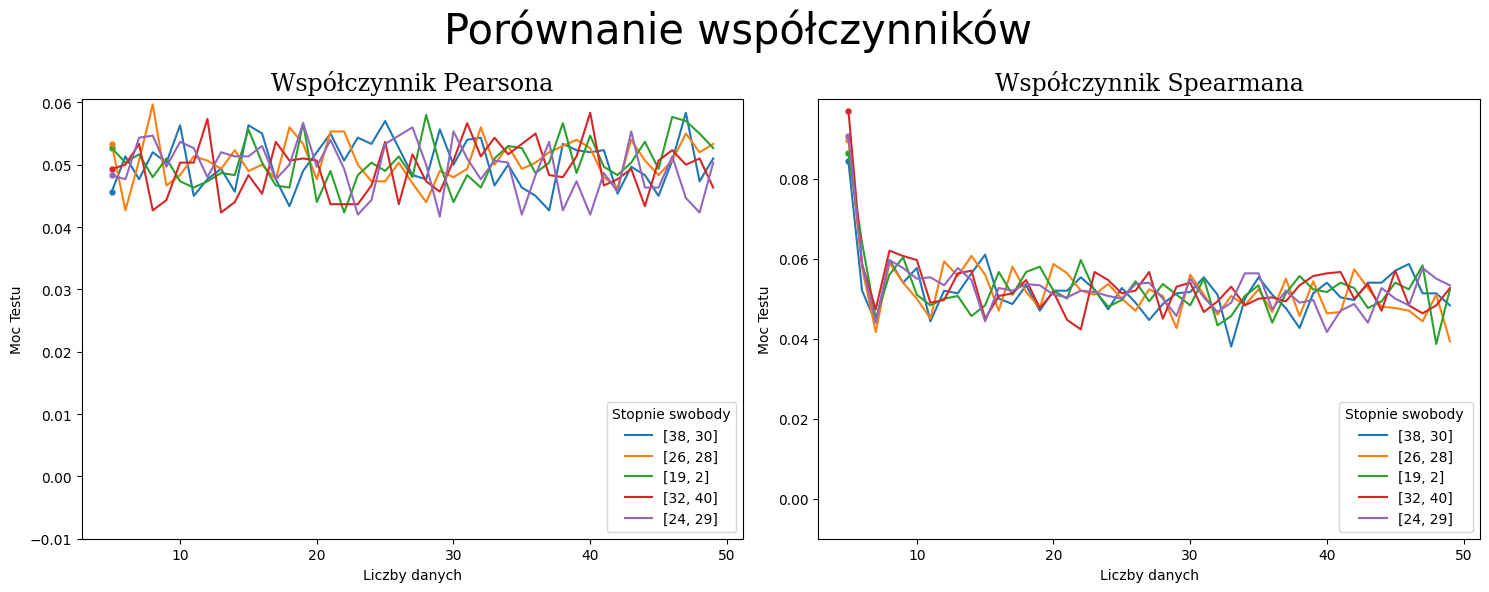

In [20]:
fig, (klasyk,mw) = plt.subplots(1,2, figsize=(15,6))  # 1 row, 2 columns

# Dodaje dane do wykres
for i,moc in enumerate(moc_pearson):
    klasyk.plot(liczby_danych,moc,label= str(stopnie[i]))
    klasyk.scatter(liczby_danych[0], moc[0], s=50, marker='.') 

for i,moc in enumerate(moc_sp):
    mw.plot(liczby_danych,moc,label= str(stopnie[i]))
    mw.scatter(liczby_danych[0], moc[0], s=50, marker='.') 


# Dodaje opisy do wykresu testu klasycznego
klasyk.set_xlabel("Liczby danych")
klasyk.set_ylabel("Moc Testu")
klasyk.set_title("Współczynnik Pearsona",fontdict=font_title)
klasyk.legend(title="Stopnie swobody",loc="lower right")
klasyk.set_ylim(-0.01)

# Dodaje opisy do wykresu 
mw.set_xlabel("Liczby danych")
mw.set_ylabel("Moc Testu")
mw.set_title("Współczynnik Spearmana",fontdict=font_title)
mw.legend(title="Stopnie swobody ",loc="lower right")
mw.set_ylim(-0.01)

fig.suptitle("Porównanie współczynników ",fontsize =30)
plt.tight_layout()
plt.show()

### Wnioski

Jak możemy zobaczyc na wykresie wspolczynnik spearmana wykazuje mniejsza dokladnosc dla malej liczby danych, gdzie wspolczynnik pearsona pozostaje tak samo dokladny(z niewielkimi malymi bledami wynoszacymi 0.01). Stopnie swobody rozkładów z ktorych wywodza sie probki nie maja zadnego wplywu na moc testu. Ogolny wniosek mozemy wysnuc jest taki, ze wspolczynnik pearsona jest bardziej dokladny niz wspolczynnik spearmana w tym wypadku